### Statistical Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy import stats

In [2]:
df_suicide = pd.read_csv('./data/df_suicide.csv')
print(df_suicide.shape)
df_suicide.head(3)

(14080, 11)


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,region
0,Albania,2002,male,75+ years,4,31007,12.90,"4,435,078,648",1573,Silent,Europe
1,Albania,2002,male,25-34 years,23,206286,11.15,"4,435,078,648",1573,Generation X,Europe
2,Albania,2002,male,35-54 years,35,382139,9.16,"4,435,078,648",1573,Boomers,Europe


In [3]:
df_conflicts = pd.read_csv('./data/df_conflicts.csv')
print(df_conflicts.shape)
df_conflicts.head(3)

(179576, 8)


,year,country,region,deaths_a,deaths_b,deaths_civilians,deaths_unknown,total_deaths
0,2017,Afghanistan,Asia,0,4,0,2,6
1,2002,Afghanistan,Asia,0,0,30,0,30
2,2003,Afghanistan,Asia,1,18,0,0,19


### Two Samples Hypothesis Testing 1

* H0: Average deaths in conflicts in Europe in the 21st century = Average deaths by suicide in Europe in the 21st century
* H1: Average deaths in conflicts in Europe in the 21st century != Average deaths by suicide in Europe in the 21st century

In [4]:
# Sorting data 
df_suicide_europe = df_suicide[df_suicide.region.isin(['Europe'])]
df_conflicts_europe = df_conflicts[df_conflicts.region.isin(['Europe'])]
suicide_europe = df_suicide_europe['suicides_no']
conflicts_europe = df_conflicts_europe['total_deaths']


# Calculation the mean
suicide_mean = np.mean(suicide_europe)
conflicts_mean = np.mean(conflicts_europe)
print('deaths by suicide mean value:', suicide_mean)
print('deaths in conflict mean value:', conflicts_mean)


# Calculation the standard deviation
suicide_std = np.std(suicide_europe)
conflicts_std = np.std(conflicts_europe)
print('deaths by suicide std value:', suicide_std)
print('deaths in conflict std value:', conflicts_std)


# T-test
ttest,pval = ttest_ind(suicide_europe, conflicts_europe, equal_var=False)
print('p-value',pval)

if pval <0.05:
    print('we reject null hypothesis')
else:
    print('we accept null hypothesis')

deaths by suicide mean value: 250.81132989025178
deaths in conflict mean value: 3.7408925318761383
deaths by suicide std value: 879.0226296748074
deaths in conflict std value: 18.503538871028333
p-value 2.2000907009093023e-104
we reject null hypothesis


### Two Samples Hypothesis Testing 2

* H0: Average deaths by suicide of men (Europe 21st century) = Average deaths by suicide of women (Europe 21st century)
* H1: Average deaths by suicide of men (Europe 21st century) != Average deaths by suicide of women (Europe 21st century)

In [5]:
# Sorting data 
df_suicide_women = df_suicide_europe[df_suicide_europe.sex.isin(['female'])]
df_suicide_men =  df_suicide_europe[df_suicide_europe.sex.isin(['male'])]  
suicide_women = df_suicide_women['suicides_no']
suicide_men = df_suicide_men['suicides_no']


# Calculation the mean
women_mean = np.mean(suicide_women)
men_mean = np.mean(suicide_men)
print('deaths by suicide women mean value:', women_mean)
print('deaths by suicide men mean value:', men_mean )


# Calculation the standard deviation
women_std = np.std(suicide_women)
men_std = np.std(suicide_men)
print('deaths by suicide women std value:', women_std)
print('deaths by suicide std men value:', men_std)


# T-test
ttest,pval = ttest_ind(suicide_women, suicide_men, equal_var=False)
print('p-value',pval)

if pval <0.05:
    print('we reject null hypothesis')
else:
    print('we accept null hypothesis')

deaths by suicide women mean value: 103.7682375726275
deaths by suicide men mean value: 397.85442220787604
deaths by suicide women std value: 248.18631170515945
deaths by suicide std men value: 1200.21738849525
p-value 1.139604359444641e-39
we reject null hypothesis


### Two Samples Hypothesis Testing 3

* H0: Average deaths by suicide of Millennials (1977-1994) = Average deaths by suicide of Generation Z (1995-2012)
* H1: Average deaths by suicide of Millennials (1977-1994)  != Average deaths by suicide of Generation Z (1995-2012)

In [6]:
# Sorting data 
df_millenials = df_suicide_europe[df_suicide_europe.generation.isin(['Millenials'])]
df_z = df_suicide_europe[df_suicide_europe.generation.isin(['Generation Z'])]
suicide_millenials = df_millenials['suicides_no']
suicide_z = df_z['suicides_no']


# Calculation the mean
millenials_mean = np.mean(suicide_millenials)
z_mean = np.mean(suicide_z)
print('deaths by suicide millenials mean value:', millenials_mean)
print('deaths by suicide generation z mean value:', z_mean)


# Calculation the standard deviation
millenials_std = np.std(suicide_millenials)
z_std = np.std(suicide_z)
print('deaths by suicide millenials std value:', millenials_std)
print('deaths by suicide std generation z value:', z_std)


# T-test
ttest,pval = ttest_ind(suicide_millenials, suicide_z, equal_var=False)
print('p-value',pval)

if pval <0.05:
    print('we reject null hypothesis')
else:
    print('we accept null hypothesis')

deaths by suicide millenials mean value: 126.30112994350283
deaths by suicide generation z mean value: 5.8503086419753085
deaths by suicide millenials std value: 526.9920552246587
deaths by suicide std generation z value: 17.490494770364492
p-value 2.627179874536029e-21
we reject null hypothesis


### One Sample Hypothesis Testing
In the One-Sample T-Test, we test the hypothesis of whether the population average is equal to a specified average.

* H0: Average deaths by suicide in Europe in the 21st century = 200
* H1: Average deaths by suicide in Europe in the 21st century > 200

In [7]:
# Calculatig mean value
suicide_eur_mean = np.mean(suicide_europe)
print(suicide_eur_mean)

# Checking whether avg deaths is 200 or not
tset, pval = ttest_1samp(suicide_europe, 200)
print('p-values',pval)
if pval < 0.05:    
    print('we are rejecting null hypothesis')
else:
    print('we are accepting null hypothesis')

250.81132989025178
p-values 5.475136552837896e-06
we are rejecting null hypothesis


In [8]:
# Computing confidence interval
mean = suicide_europe.mean()
mean = suicide_europe.mean()
df = len(suicide_europe) - 1
se = stats.sem(suicide_europe)
confidence_int = stats.t.interval(0.95, df, loc = mean, scale = se)
confidence_int

(228.91797329317467, 272.7046864873289)

### Plotting Distributions

In [9]:
# Function to plot distribution
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

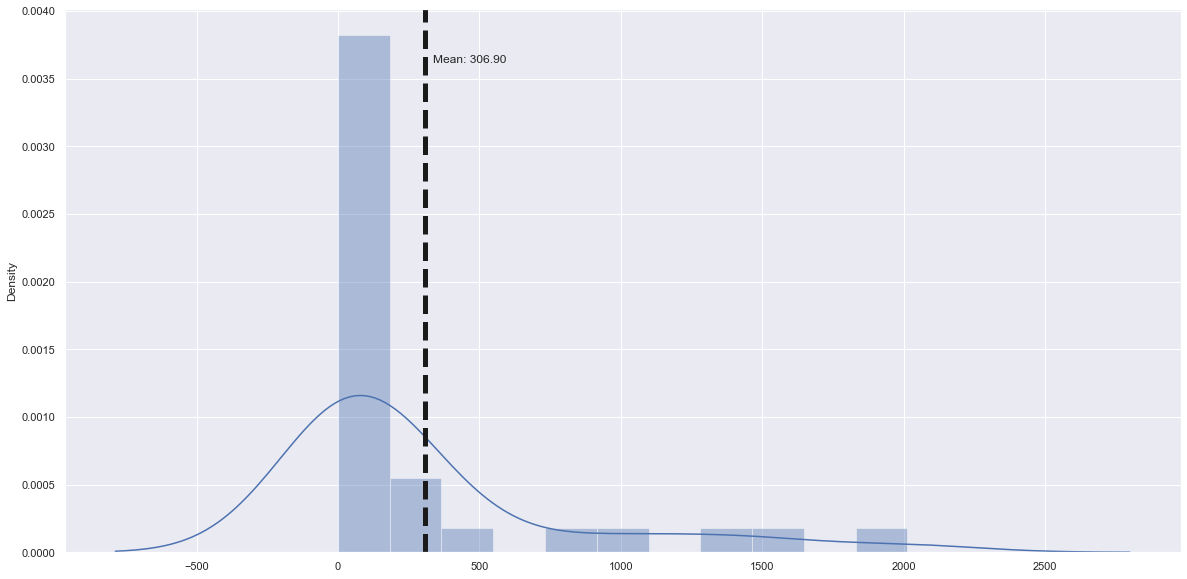

In [10]:
# Sampling and plotting
sample_size = 30
suicide_sampled = np.random.choice(suicide_europe, sample_size)
conflicts_sampled = np.random.choice(conflicts_europe, sample_size)

plot_distribution(suicide_sampled)

plt.show()

## Boxplots

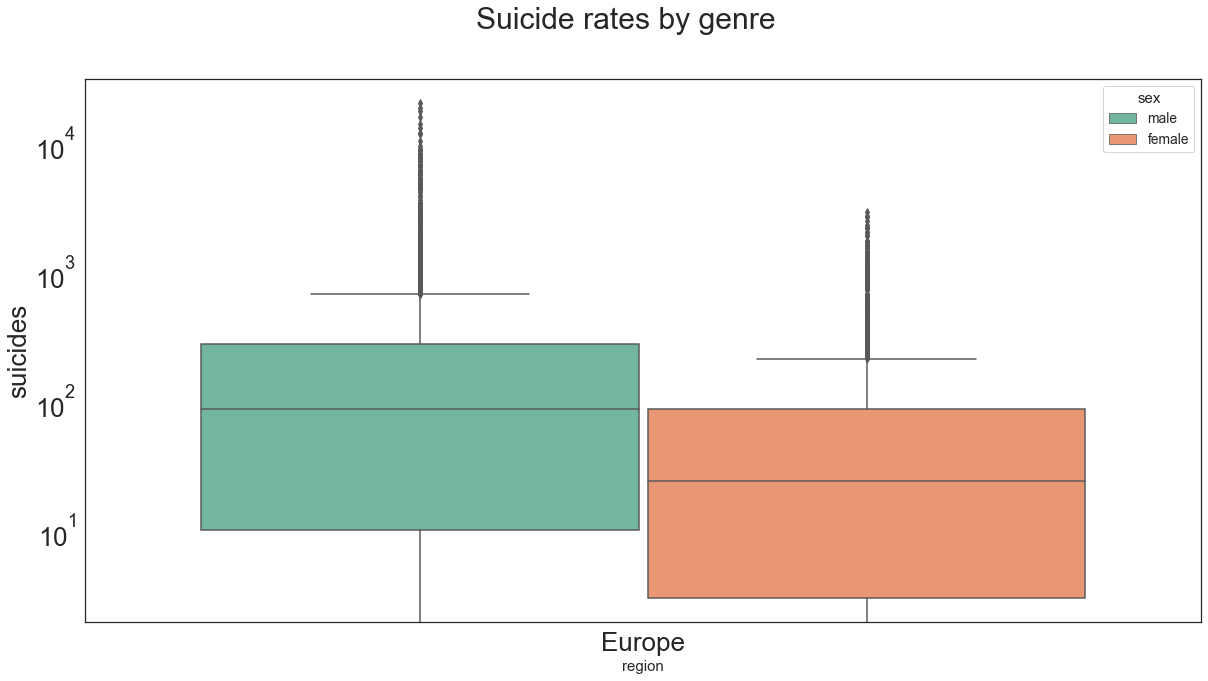

In [11]:
sns.set_theme(style="ticks", font_scale=1.25)
sns.set_style('white')
f, ax = plt.subplots(figsize=(20, 10))
ax.set_yscale('log')
sns.color_palette('pastel')
sns.set_palette('Set2', 8)

ax = sns.boxplot(x = df_suicide_europe['region'] , y = df_suicide_europe['suicides_no']
                 , hue = df_suicide_europe['sex'])
ax.tick_params(axis = 'both', which = 'major', labelsize = 26) 
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)


#plt.xlabel('region', fontsize = 26)
plt.ylabel('suicides', fontsize = 26)
plt.suptitle('Suicide rates by genre', fontsize = 30)
plt.show()

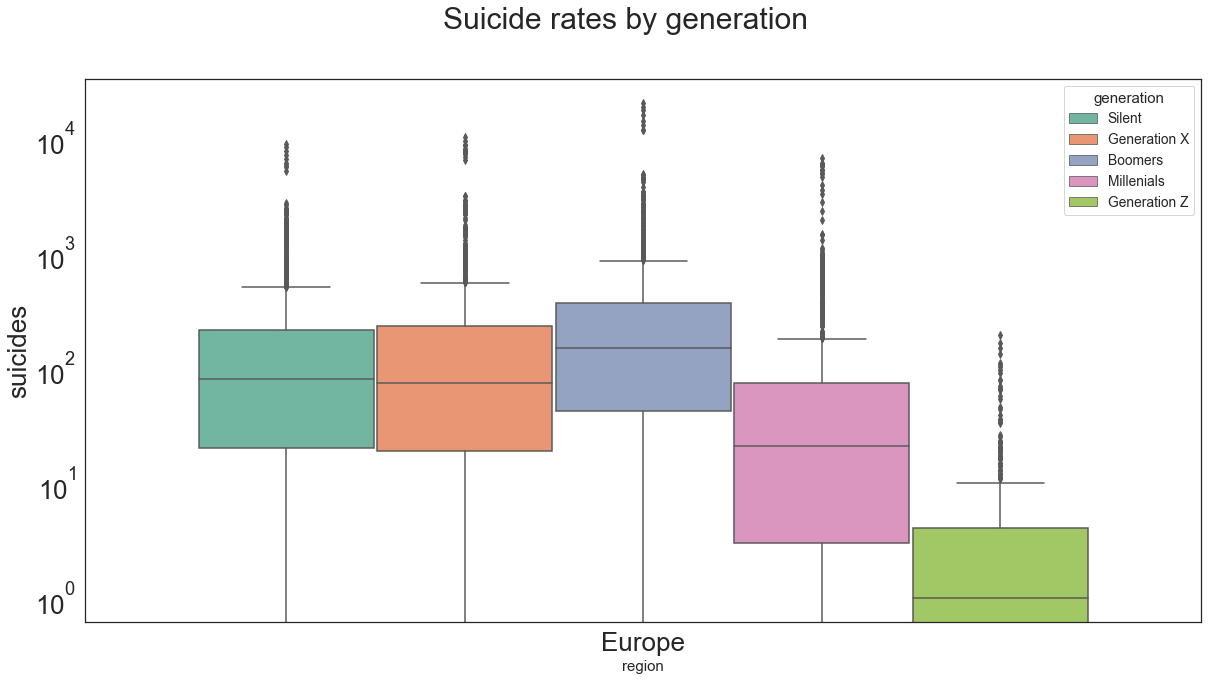

In [12]:
sns.set_theme(style="ticks", font_scale=1.25)
sns.set_style('white')
f, ax = plt.subplots(figsize=(20, 10))
ax.set_yscale('log')
sns.color_palette('pastel')
sns.set_palette('Set2', 8)

ax = sns.boxplot(x = df_suicide_europe['region'] , y = df_suicide_europe['suicides_no']
                 , hue = df_suicide_europe['generation'])
ax.tick_params(axis = 'both', which = 'major', labelsize = 26) 
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)


#plt.xlabel('region', fontsize = 26)
plt.ylabel('suicides', fontsize = 26)
plt.suptitle('Suicide rates by generation', fontsize = 30)
plt.show()

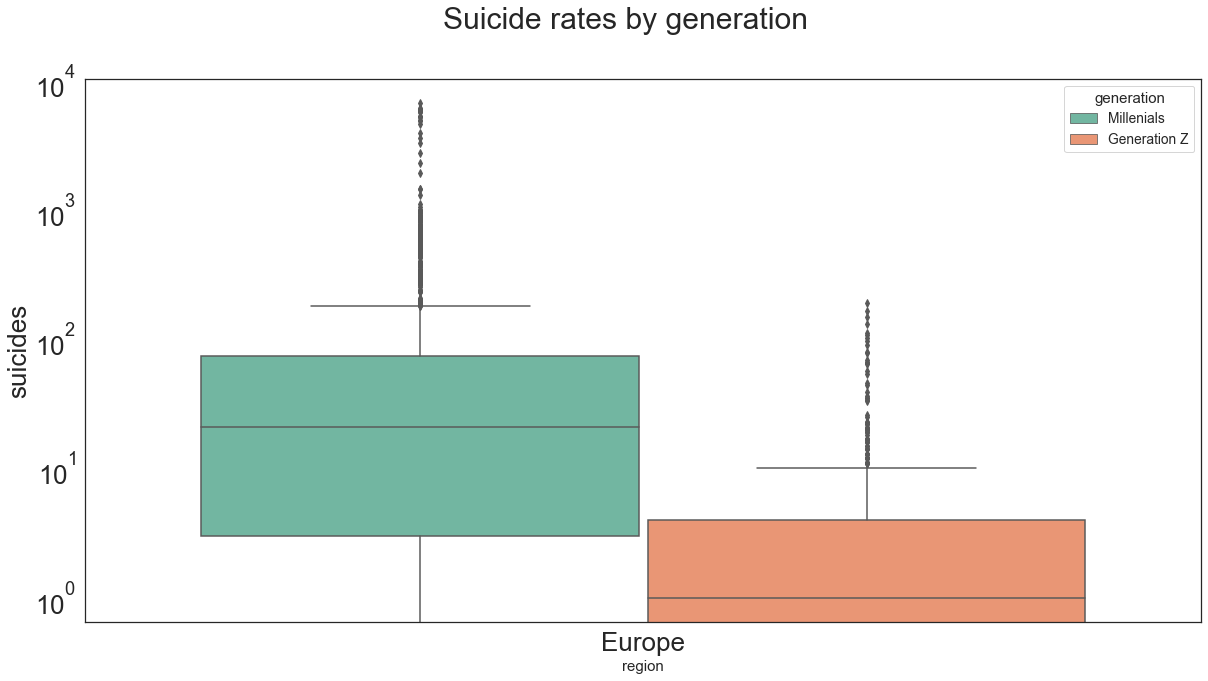

In [13]:
df_generation = df_suicide_europe[df_suicide_europe.generation.isin(['Millenials','Generation Z'])]

sns.set_theme(style="ticks", font_scale=1.25)
sns.set_style('white')
f, ax = plt.subplots(figsize=(20, 10))
ax.set_yscale('log')
sns.color_palette('pastel')
sns.set_palette('Set2', 8)

ax = sns.boxplot(x = df_generation['region'] , y = df_generation['suicides_no']
                 , hue = df_generation['generation'])
ax.tick_params(axis = 'both', which = 'major', labelsize = 26) 
ax.tick_params(axis = 'both', which = 'minor', labelsize = 26)


#plt.xlabel('region', fontsize = 26)
plt.ylabel('suicides', fontsize = 26)
plt.suptitle('Suicide rates by generation', fontsize = 30)
plt.show()